<a href="https://colab.research.google.com/github/Shubham11cmd/TSFiot/blob/main/TSF_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Computer Vision and Internet of things**

Task 2: Colour Identification

Shubham Sharma

[array([182.50269139, 188.64869916,  32.9822817 ]),
 array([227.91524755, 226.52350582, 156.6361365 ]),
 array([132.91706387, 151.96352989,  24.9310636 ]),
 array([251.35613129, 248.88853715, 226.5134955 ]),
 array([66.43489367, 85.72833514, 13.94129042]),
 array([42.90106517, 41.5476178 , 18.94705635]),
 array([205.54631427, 204.06953362,  92.10372804]),
 array([ 96.23282581, 118.51708356,  17.26812579])]

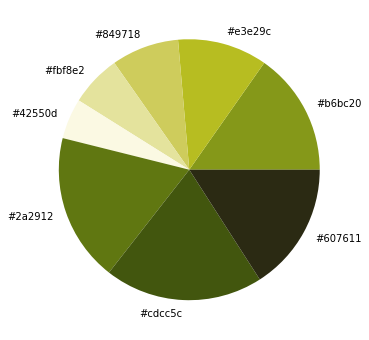

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors

get_colors(get_image('sample1.jpeg'), 8, True)

Input 
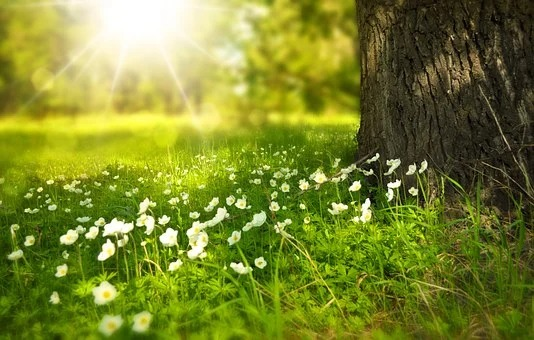